# Lab9-10: Scikit-Learn (model trainging/testing) & KNN

**Goal:**
Learn the basics of fitting, predicting, and visualizing a decision tree model using scikit-learn.

**Steps:**

**Data Preparation:**

Load a dataset suitable for a classification or regression task.
Split the dataset into features (X) and the target variable (y).

**Train-Test Split:**

Split the data into training and testing sets using train_test_split from scikit-learn.

**Create and Fit a Decision Tree Model:**

Import DecisionTreeClassifier or DecisionTreeRegressor depending on the task.
Create an instance of the model.
Fit the model to the training data using the fit method.

**Make Predictions:**

Use the trained model to make predictions on the test set using the predict method.

**Visualize the Decision Tree:**

Use plot_tree or other visualization tools to create a visual representation of the decision tree structure.
Optionally, export and display the decision tree rules as text using export_text.

**Evaluate Model (Accuracy, Classification Report)**

**Impliment KNN**

# Stage 0: Data Preparation

In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt

#imports for KNN
import numpy as np
from collections import Counter


iris = load_iris()
X = iris.data
y = iris.target 

# Stage 1: Train-Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

# Stage 2: Create and Fit a Decision Tree

In [23]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

# Stage 3: Make Predition

In [24]:
y_pred = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print(accuracy)

0.9333333333333333


# Stage 4: Visualize the Decision Tree

[Text(0.375, 0.875, 'x[3] <= 0.7\ngini = 0.666\nsamples = 105\nvalue = [37, 34, 34]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 4.85\ngini = 0.5\nsamples = 68\nvalue = [0, 34, 34]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[0] <= 5.05\ngini = 0.061\nsamples = 32\nvalue = [0, 31, 1]'),
 Text(0.125, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

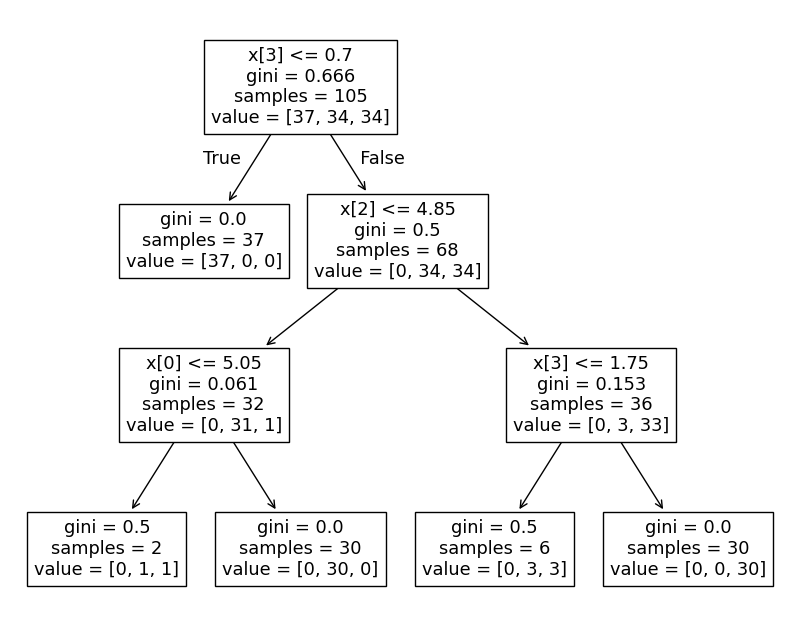

In [25]:
plt.figure(figsize=(10, 8))

plot_tree(model)

# Stage 5: Evaluating the model (accuracy, classification_report)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names) #  precision, recall, f1-score, support

print(accuracy)
print(report)

0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.84      1.00      0.91        16
   virginica       1.00      0.81      0.90        16

    accuracy                           0.93        45
   macro avg       0.95      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



## Notes

Precision -> correct positive predictions

Recall -> how many actual positives were found

F1-score -> balance between precision and recall

Support -> number of samples of each class


**Gini impurety**
Gini impurity shows how mixed the classes are inside a node.
The lower the gini, the cleaner the node.
Decision trees use Gini impurity to decide the best splits to separate classes.

# KNN

## Stage 6: Calcularing the Euclidean_disrance (using the function to call is later)

In [40]:
def euclid_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

## Stage 7: The prediction function

In [44]:
def knn_pred(test_point, X_train, y_train, K=3):

    dist = []

    for i in range(len(X_train)):
        d = euclid_dist(test_point, X_train[i])
        dist.append((d, y_train[i]))

    dist.sort(key=lambda x: x[0])

    k_neighbors = dist[:K]

    k_labels = [label for (_, label) in k_neighbors]

    most_common = Counter(k_labels).most_common(1)[0][0]
    return most_common

## Stage 8: Results

In [86]:
correct = 0
preds = []

for i in range(len(X_test)):
    pred = knn_pred(X_test[i], X_train, y_train, K=3)
    preds.append(pred)

    if pred == y_test[i]:
        correct += 1

accuracy = correct / len(X_test)


print("\nPreds:\n", preds)
print("\n\nActual:\n", list(y_test))
print(f"\nAccuracy: {accuracy:.2f}")



Preds:
 [np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(2), np.int64(2), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1)]


Actual:
 [np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.int64(2), np.

## KNN:Using 2 classes to show on plot + verification

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [128]:
X_2d = X[:, :2]

# choicing the less data point
#X_train, y_train = X_2d[:110], y[:110]
#X_test, y_test = X_2d[110:], y[110:]

X_train, X_test, y_train, y_test = train_test_split(
    X_2d, y, test_size=0.25)

In [129]:
# same functions as above (just copy pasted it)

def euclid_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def knn_pred(test_point, X_train, y_train, K=3):

    dist = []

    for i in range(len(X_train)):
        d = euclid_dist(test_point, X_train[i])
        dist.append((d, y_train[i]))

    dist.sort(key=lambda x: x[0])

    k_neighbors = dist[:K]

    k_labels = [label for (_, label) in k_neighbors]

    most_common = Counter(k_labels).most_common(1)[0][0]
    return most_common


## Stage 9: Reuslts

In [130]:
test_point = X_test[0]

pred_class_man = knn_pred(test_point, X_train, y_train, K=3)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred_class_sklearn = knn.predict([test_point])[0]

print(f"manual KNN pred class: {pred_class_man}")
print(f"sklearn KNN pred class: {pred_class_sklearn}")


manual KNN pred class: 2
sklearn KNN pred class: 2


## Stage 10: plot

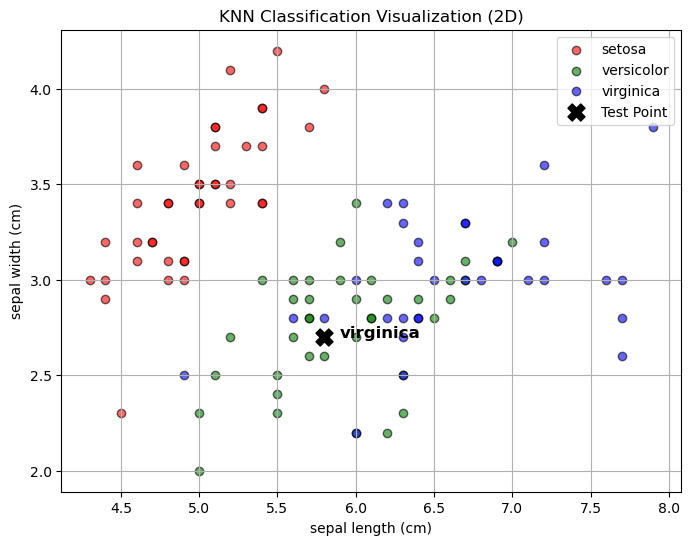

In [131]:
plt.figure(figsize=(8,6))

colors = ['red', 'green', 'blue']
for class_value in np.unique(y_train):
    plt.scatter(X_train[y_train == class_value, 0], X_train[y_train == class_value, 1],
                c=colors[class_value], label=iris.target_names[class_value], edgecolor='k', alpha=0.6)

plt.scatter(test_point[0], test_point[1], c='black', label='Test Point', s=150, marker='X')

plt.text(test_point[0] + 0.1, test_point[1], f'{iris.target_names[pred_class_man]}',
         fontsize=12, fontweight='bold')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("KNN Classification Visualization (2D)")
plt.legend()
plt.grid(True)
plt.show()

## Stage 11: Evaluation

In [132]:
preds = [knn_pred(x, X_train, y_train, K=3) for x in X_test]

print(classification_report(y_test, preds, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.41      0.64      0.50        11
   virginica       0.64      0.41      0.50        17

    accuracy                           0.63        38
   macro avg       0.68      0.68      0.67        38
weighted avg       0.67      0.63      0.63        38



In [133]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10, centers=3, n_features=2,
                  random_state=0)
print(X.shape)
y
X, y = make_blobs(n_samples=[3, 3, 4], centers=None, n_features=2,
                  random_state=0)
print(X.shape)
y

(10, 2)
(10, 2)


array([0, 1, 2, 0, 2, 2, 2, 1, 1, 0])